In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.8.0


In [2]:
# Define Constant
batchSize = 128
epochs = 100
numClasses = 10 #mnist (0~9)

In [3]:
# Downliad MNIST Dataset
mnist = keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

In [4]:
print(len(trainImages))
print(len(testImages))

60000
10000


In [5]:
# Normalize the input image so that each pixel values is between 0 to 1
trainImages = trainImages/255.0
testImages = testImages/255.0


In [6]:
# Define the model architecture with CNN
model = keras.Sequential([
    # Input Layers
    keras.layers.Flatten(input_shape=(28,28)),
    
    # Hidden Layers
    # keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Reshape(target_shape=(28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dropout(0.5),
    
    # Output Layers
    keras.layers.Dense(numClasses, activation='softmax')
])

model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [10]:
# Save the best model as digit_model.h5
filePath = "./model/digits_model.h5"
modelCheckPoint = tf.keras.callbacks.ModelCheckpoint(filepath=filePath, save_best_only=True)

In [12]:
history = model.fit(trainImages, trainLabels, 
                    validation_data=(testImages, testLabels),
                    epochs=epochs, batch_size=batchSize,
                    callbacks=[modelCheckPoint])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0356 - val_accuracy: 0.9933
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0364 - val_accuracy: 0.9935
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0375 - val_accuracy: 0.9930
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0365 - val_accuracy: 0.9921
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0383 - val_accuracy: 0.9933
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0358 - val_accuracy: 0.9940
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0364 - val_accuracy:

In [ ]:
# Download the digit classification model if you use Colab
download(filePath)

In [ ]:
# Evaluate the model using test dataset
testLoss, testAccuracy = model.evaluate(testImages, testLabels)
print(testLoss, testAccuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1368 - accuracy: 0.9796
0.1368352174758911 0.9796000123023987


In [ ]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()


# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()
  
  
# Download the digit classification model if you're using Colab,
# or print the model's local path if you're not using Colab.
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error dowbload:', os.path.join(os,getcwd(), path))

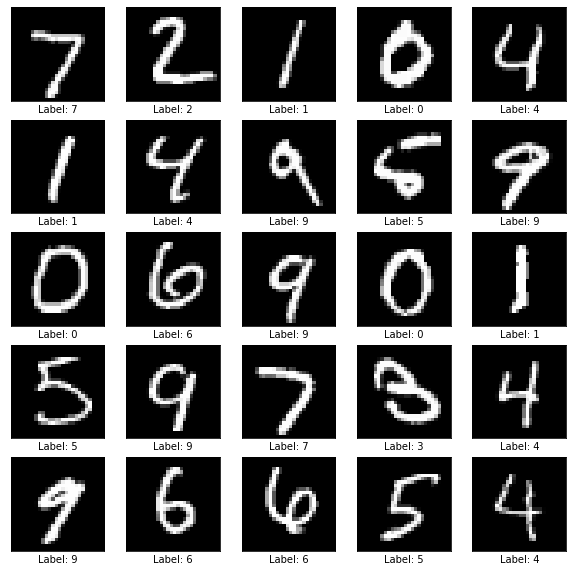

In [ ]:
# Show the first 25 images in the training dataset.
show_sample(testImages, ['Label: %s' % label for label in testLabels])

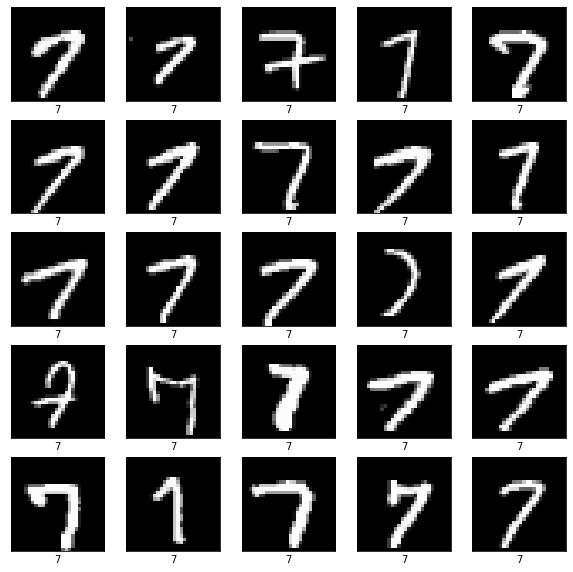

In [ ]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(trainImages, trainLabels, 7, sample_count=25)


Text(0, 0.5, 'loss')

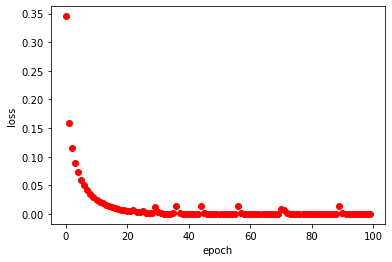

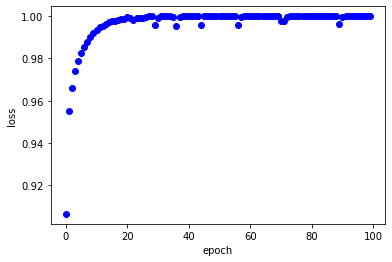

In [ ]:
# Evaluate the model using test dataset. - Show performance
fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label="TrainLoss")
loss_ax.plot(history.history['val_loss'], 'r:', label="ValidaionLoss")
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')


acc_ax.plot(history.history['accuracy'], 'bo', label="TrainAccuracy")
acc_ax.plot(history.history['val_accuracy'], 'b:', label="ValidationAccuracy")
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('loss')
acc_ax.legend(loc='upper left')


In [ ]:
# Precict the label of digit images in our test dataset
predictions = model.predict(testImages)

# Plot the first 25 test images and their predicted label
show_sample(testImages, ["Predicted : %d" % np.argmax(result) for result in predictions])

Number is  3


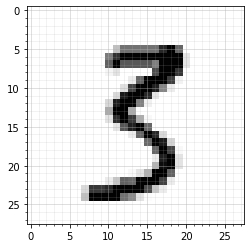

In [ ]:
digit = 3532
selected_digit = digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2d' % result_number)
show_digit_image(testImages[selected_digit])